# Loading Data and Preprocessing:

In [66]:
# Importing modules and reading data
import pandas as pd
import numpy as np
import os

os.getcwd()
df =pd.read_csv("train_fwYjLYX.csv");

In [67]:
#check to see if there are any columns with null values in each segment
df[df['segment']==1].isnull().sum()

application_date    0
segment             0
branch_id           0
state               0
zone                0
case_count          0
dtype: int64

In [68]:
df[df['segment']==2].isnull().sum()

application_date        0
segment                 0
branch_id           13504
state                   0
zone                13504
case_count              0
dtype: int64

# Feature Engineering

In [69]:

#Generating new features based on non null columns:


#Generating features from application date such as year, month, day, week day etc.

import time
r=len(df)
app_dow=['none'] * r

fdate_list=df['application_date'].tolist()

for i in range(0,len(df)):
    app_dow[i]=time.strptime(fdate_list[i],'%Y-%m-%d');

app_df=pd.DataFrame(app_dow, columns=['year','month','day','hour','min','sec','wday','yday','isdst'])

app_q=[0] * r

# Generating quarter feature for quarter i  which the date falls
for i in range(0,len(df)):
    x=app_df.loc[i,'month']/12;
    if x<= 0.25:
        app_q[i]=1;
    elif (x> 0.25 and x<= 0.5):
        app_q[i]=2;
    elif (x> 0.5 and x<= 0.75):
        app_q[i]=3;
    else:
        app_q[i]=4;
        

In [70]:
#Generating Features from festival dates in respective years 

import datetime

#Reading Holidays Dataset
fes=pd.read_csv("Holidays.csv")

d=df['application_date'].tolist();
p1f=[0] * r;
p2f=[0] * r;
p3f=[0] * r;

f=fes['DATE'].tolist()
for i in range(0,r):
    p1=0;
    p2=0;
    p3=0;
    
    x = datetime.datetime.strptime(d[i], "%Y-%m-%d")
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=7)):
            p1=1;
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=14)):
            p2=1;
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=30)):
            p3=1;
    p1f[i]=p1;
    p2f[i]=p2;
    p3f[i]=p3;


In [71]:
#Generating several features, indicating if a festival is with in 1 week, 2 weeks or 1 month from application data 
#and inputing cell values as binary 
dfm=pd.concat([df,app_df], axis=1)
dfm['fin1']=pd.DataFrame(p1f);
dfm['fin2']=pd.DataFrame(p2f);
dfm['fin1m']=pd.DataFrame(p3f);

In [72]:
#Generating inflation rate in india on application date
ifr1=pd.read_csv('DP_LIVE_26012020022054718.csv')
ifrate1=pd.DataFrame(columns=['inflation_rate'], index=range(0,r));
ifrate1['inflation_rate']=ifrate1['inflation_rate'].apply(pd.to_numeric);
for i in range(0,r):
    for j in ifr1[ifr1['LOCATION']=='IDN'].index.tolist():
        if (((((str(ifr1.loc[j,'TIME']))[0:4])) == ((str(df.loc[i,'application_date'])[0:4]))) and (((str(ifr1.loc[j,'TIME']))[5:7]) == ((str(df.loc[i,'application_date']))[5:7]))):
            ifrate1.loc[i,'inflation_rate']=ifr1.loc[j,'Value'];
dfm['inflation_rate']=ifrate1['inflation_rate'];            

# Data for segment1

In [73]:
#Considering Data for only Segment 1:
dfm1=dfm[dfm['segment']==1];

In [74]:
# Features generated from State and Zone columns
# Generated Features contain the number of branches in respective state and number of branches in respective zone for 
# given branch and zone for application case_count information
r1=len(dfm1)
nbs=[0] * r1
nbz=[0] * r1

for i in range(0,r1):
    nbs[i]=len(dfm1[dfm1['state']==dfm1.loc[i,'state']]['branch_id'].unique());
    nbz[i]=len(dfm1[dfm1['zone']==dfm1.loc[i,'zone']]['branch_id'].unique());

r1=len(dfm1)
dfm1['sb']=pd.DataFrame(nbs);
dfm1['zb']=pd.DataFrame(nbz);

dfm1=dfm1.drop(['hour','min','sec','isdst'],axis=1)

C:\Users\dured\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\dured\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
# DataFrame after generating features from application date column, festivals data set, inflation rates dataset, branches in 
# state and zone information 
dfm1

,application_date,segment,branch_id,state,zone,case_count,year,month,day,wday,yday,fin1,fin2,fin1m,inflation_rate,sb,zb
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,1,5,91,0,1,1,4.172417,8,27
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,3,0,93,0,1,1,4.172417,8,27
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,4,1,94,0,1,1,4.172417,8,27
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,5,2,95,0,1,1,4.172417,8,27
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,7,4,97,1,1,1,4.172417,8,27
5,2017-04-12,1,1.0,WEST BENGAL,EAST,123.0,2017,4,12,2,102,1,1,1,4.172417,8,27
6,2017-04-13,1,1.0,WEST BENGAL,EAST,81.0,2017,4,13,3,103,1,1,1,4.172417,8,27
7,2017-04-14,1,1.0,WEST BENGAL,EAST,117.0,2017,4,14,4,104,1,1,1,4.172417,8,27
8,2017-04-15,1,1.0,WEST BENGAL,EAST,127.0,2017,4,15,5,105,0,0,0,4.172417,8,27
9,2017-04-16,1,1.0,WEST BENGAL,EAST,42.0,2017,4,16,6,106,0,0,0,4.172417,8,27


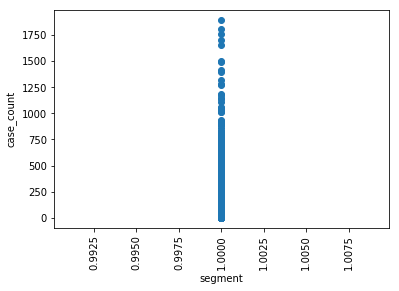

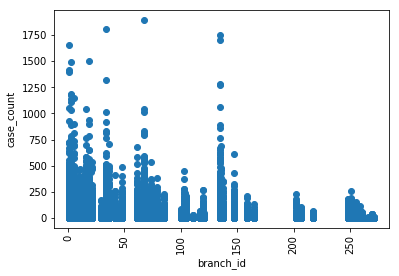

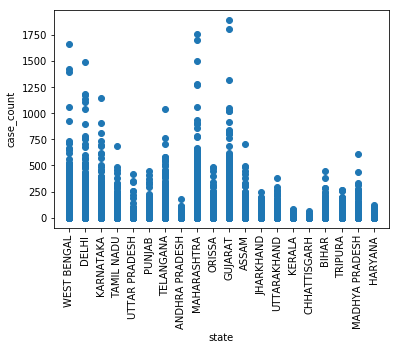

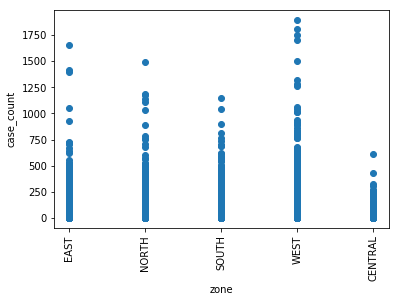

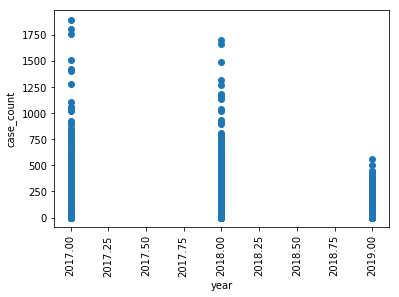

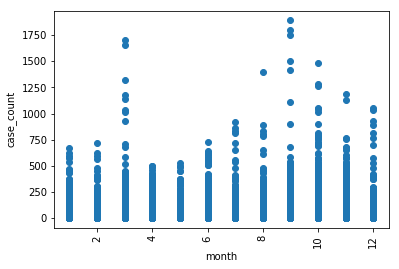

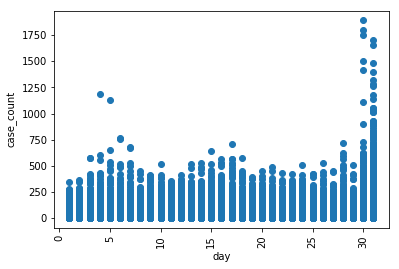

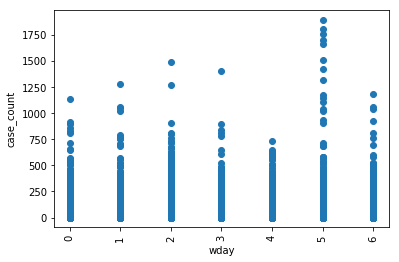

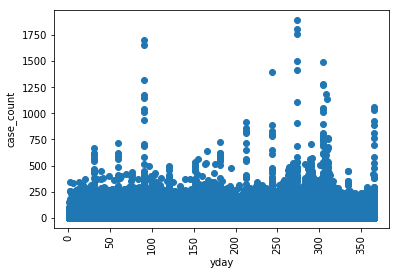

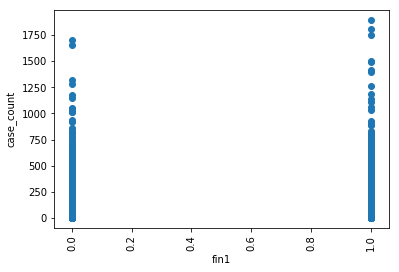

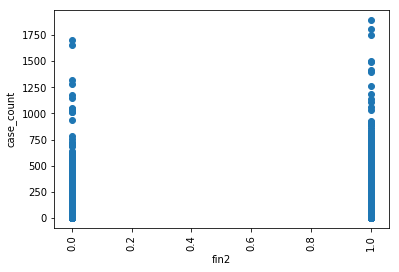

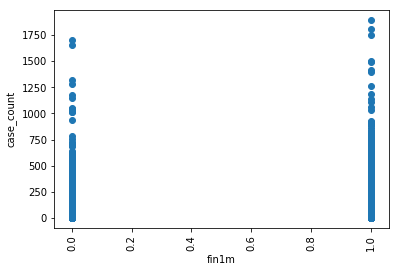

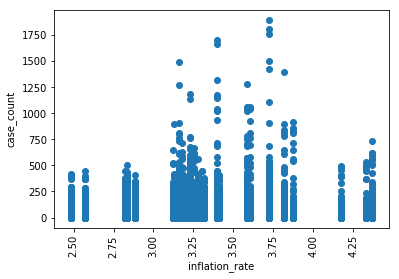

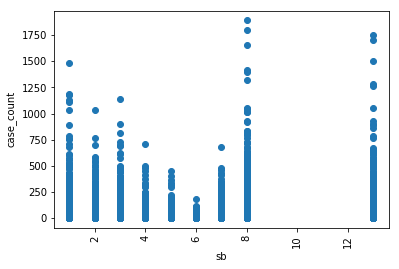

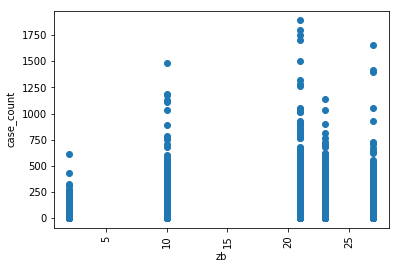

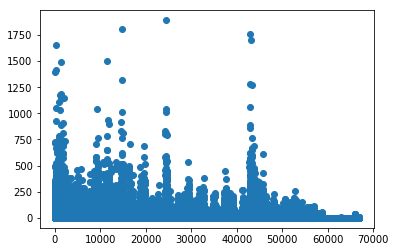

In [77]:
# exploring data by plotting relationship between case_count and features, to check if there are any hidden relations 
# as well as identifying outliers and identiying any significant predictors
import matplotlib.pyplot as plt

x=dfm1.columns.tolist();
x.remove('case_count')
x.remove('application_date')
for each in x:
    plt.xlabel(each);
    plt.ylabel('case_count');
    plt.xticks(rotation=90);
    plt.scatter(dfm1[each],dfm1['case_count']);
    plt.show();

plt.scatter(dfm1.index,dfm1['case_count']);

In [12]:
#Generating dummies from categorical variables using one-hot encoding
dfm1_wd=pd.get_dummies(dfm1, columns=['branch_id', 'state', 'zone', 'year', 'month', 'day', 'wday'], prefix=['branch','s', 'z', 'y','m','d','wday'])

dfm1_wd.drop(columns=['application_date','segment', 'yday'], inplace=True);

In [12]:
# Defining a funtion to output models hyper parameter combination from gridsearch method, that best suits the training data
def print_results(x):
    v=len(x['mean_fit_time']);
    for i in range(0,v):
        print('Model with hyperparameter combination - {0}, mean_test score is {1}, std_test_score is {2}, rank_test_score is {3} and mean_fit_time is {4}'.format(x['params'][i], x['mean_test_score'][i], x['std_test_score'][i], x['rank_test_score'][i], x['mean_fit_time'][i]));    

In [14]:
# Data with Categorical variables encoded
dfm1_wd

,case_count,fin1,fin2,fin1m,inflation_rate,sb,zb,branch_1.0,branch_3.0,branch_5.0,...,d_29,d_30,d_31,wday_0,wday_1,wday_2,wday_3,wday_4,wday_5,wday_6
0,40.0,0,1,1,4.172417,8,27,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,5.0,0,1,1,4.172417,8,27,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,4.0,0,1,1,4.172417,8,27,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,113.0,0,1,1,4.172417,8,27,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,76.0,1,1,1,4.172417,8,27,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,123.0,1,1,1,4.172417,8,27,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,81.0,1,1,1,4.172417,8,27,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,117.0,1,1,1,4.172417,8,27,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,127.0,0,0,0,4.172417,8,27,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,42.0,0,0,0,4.172417,8,27,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# Train-Validation Split(Segment 1):

In [ ]:
x11=dfm1_wd.drop(['case_count'], axis=1);
y11=dfm1_wd['case_count'];

# Splitting the data into Train and Validation Sets:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x11, y11, test_size=0.85);

# Model Building---Segment 1 Data

# MLP Regressor

In [15]:
# MLP Regressor:
from sklearn.neural_network import MLPRegressor

print(MLPRegressor());

import joblib
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

model=MLPRegressor();
param_list = {"hidden_layer_sizes": [(10,), (50,), (250,)], "activation": ["logistic", "tanh", "relu"], 'learning_rate' : ['constant','invscaling','adaptive']};
gridcv = GridSearchCV(estimator=model, param_grid=param_list, cv=5)
gridcv.fit(xtrain, ytrain.values.ravel());
x=gridcv.cv_results_
print_results(x);

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}, mean_test score is 0.3077387948427793, std_test_score is 0.05435866373711452, rank_test_score is 27 and mean_fit_time is 5.237351989746093
Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}, mean_test score is 0.3224675336048748, std_test_score is 0.07516917730550317, rank_test_score is 25 and mean_fit_time is 5.230765151977539
Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}, mean_test score is 0.31987108309208606, std_test_score is 0.03667661517821945, rank_test_score is 26 and mean_fit_time is 5.1511224746704105
Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}, mean_test score is 0.6159065805805043, std_test_score is 0.0470504951431391

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
#Pickling the best estimator(hyper parameter combination, that best fits the training dataset)
estimator=gridcv.best_estimator_
joblib.dump(estimator,'nne.pkl')

xtrain.to_csv('xtrain.csv', index=False);
ytrain.to_csv('ytrain.csv', index=False);
xval.to_csv('xval.csv', index=False);
yval.to_csv('yval.csv', index=False);

# Random Forest Regressor

In [18]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
model=RandomForestRegressor();
param_list = {"max_depth": [5,10,25], "max_leaf_nodes": [2,5,10], 'n_estimators' : [10,50]};
gridcv = GridSearchCV(estimator=model, param_grid=param_list, cv=5)
gridcv.fit(xtrain, ytrain);
x=gridcv.cv_results_
print_results(x);

Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 2, 'n_estimators': 10}, mean_test score is 0.09341226072460956, std_test_score is 0.03671866809304149, rank_test_score is 18 and mean_fit_time is 0.23471956253051757
Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 2, 'n_estimators': 50}, mean_test score is 0.0948229464635191, std_test_score is 0.036357709969031954, rank_test_score is 17 and mean_fit_time is 1.0054309368133545
Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 10}, mean_test score is 0.2551201749657803, std_test_score is 0.04796852411845043, rank_test_score is 12 and mean_fit_time is 0.4212927341461182
Model with hyperparameter combination - {'max_depth': 5, 'max_leaf_nodes': 5, 'n_estimators': 50}, mean_test score is 0.27308498103513096, std_test_score is 0.03376556010176299, rank_test_score is 7 and mean_fit_time is 2.0518581867218018
Model with hyperparameter combination - {

In [20]:
estimator=gridcv.best_estimator_
joblib.dump(estimator,'rfe.pkl')

['rfe.pkl']

# XGBoost Regressor

In [21]:
#XGB Regressor
import xgboost as xgb

xgb.XGBRegressor()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [10]:
import xgboost as xgb
import pandas as pd 
import joblib
from sklearn.model_selection import GridSearchCV

xtrain=pd.read_csv('xtrain.csv');
ytrain=pd.read_csv('ytrain.csv', header=None);

model=xgb.XGBRegressor();
param_list = {"max_depth": [5,10,25], "learning_rate": [0.01,0.1], 'n_estimators' : [50,100]};
gridcv = GridSearchCV(estimator=model, param_grid=param_list, cv=5)
gridcv.fit(xtrain, ytrain.values.ravel());
x=gridcv.cv_results_


[12:54:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:54:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:55:32] WARNI

[13:10:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:12:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:13:53] WARNI

NameError: name 'print_results' is not defined

In [13]:
print_results(x);
estimator=gridcv.best_estimator_
joblib.dump(estimator,'xgbe.pkl')

Model with hyperparameter combination - {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}, mean_test score is 0.1147510183914931, std_test_score is 0.032079592701509015, rank_test_score is 12 and mean_fit_time is 6.091225004196167
Model with hyperparameter combination - {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}, mean_test score is 0.308572782638158, std_test_score is 0.039555203923773666, rank_test_score is 9 and mean_fit_time is 11.810474967956543
Model with hyperparameter combination - {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}, mean_test score is 0.1971527076644988, std_test_score is 0.02505081720792689, rank_test_score is 11 and mean_fit_time is 10.77973313331604
Model with hyperparameter combination - {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}, mean_test score is 0.40400685675741543, std_test_score is 0.03949182847147023, rank_test_score is 8 and mean_fit_time is 21.403538608551024
Model with hyperparameter combinat

['xgbe.pkl']

# Data for Segment 2.

In [23]:
dfm2=dfm[dfm['segment']==2];

In [24]:
dfm2.drop(['branch_id','zone','hour','min','sec','isdst'], axis=1, inplace=True);

C:\Users\dured\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


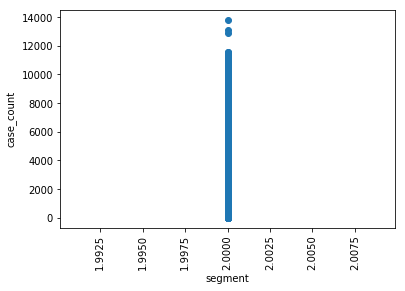

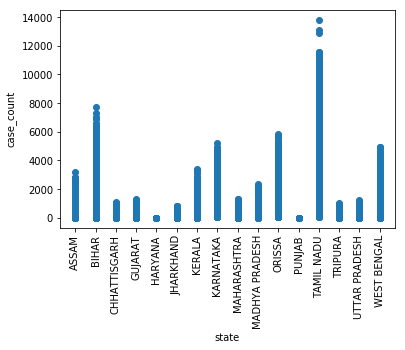

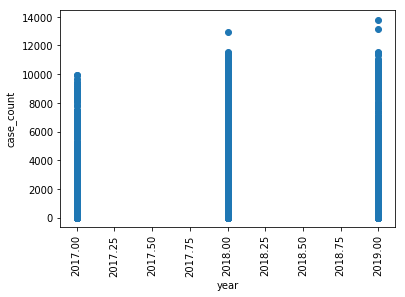

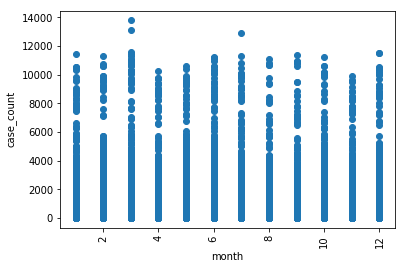

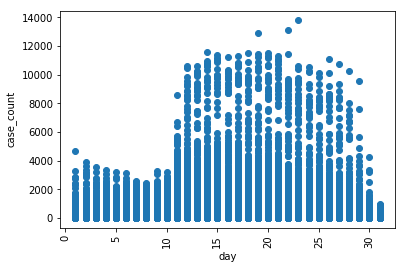

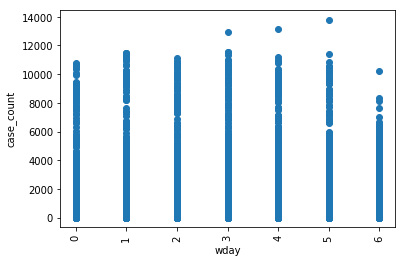

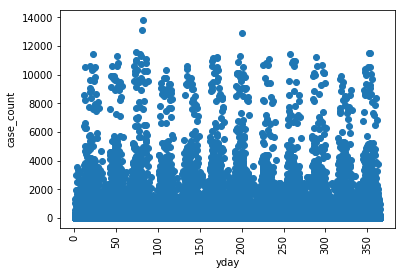

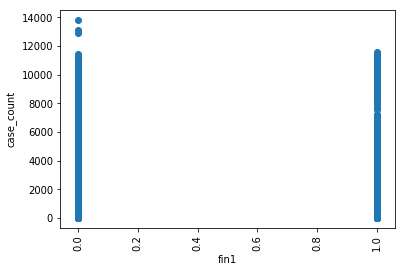

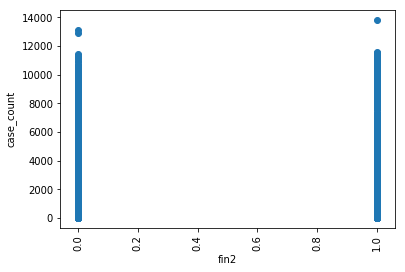

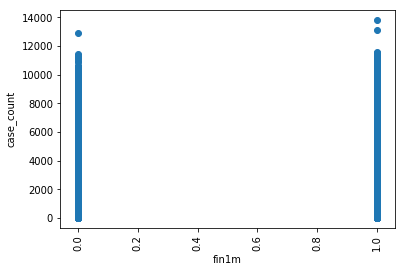

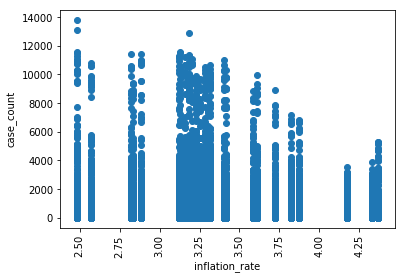

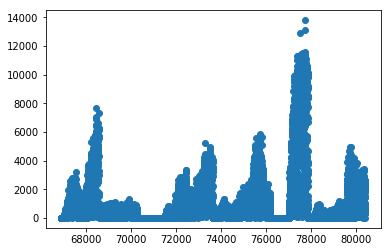

In [25]:
# Data Exploration on Segment 2
import matplotlib.pyplot as plt

x=dfm2.columns.tolist();
x.remove('case_count')
x.remove('application_date')
for each in x:
    plt.xlabel(each);
    plt.ylabel('case_count');
    plt.xticks(rotation=90);
    plt.scatter(dfm2[each],dfm2['case_count']);
    plt.show();

plt.scatter(dfm2.index,dfm2['case_count']);

In [26]:
dfm2_wd=pd.get_dummies(dfm2, columns=['state', 'year', 'month', 'day', 'wday'], prefix=['s','y','m','d','wday'])

dfm2_wd.drop(columns=['application_date','segment', 'yday'], inplace=True);

In [27]:
c=[]
for each in dfm2_wd.columns:
    if(each!='case_count'):
        c.append(each)
Xtrain_segment2=dfm2_wd[c];

In [28]:
Xtrain_segment2

,fin1,fin2,fin1m,inflation_rate,s_ASSAM,s_BIHAR,s_CHHATTISGARH,s_GUJARAT,s_HARYANA,s_JHARKHAND,...,d_29,d_30,d_31,wday_0,wday_1,wday_2,wday_3,wday_4,wday_5,wday_6
66898,0,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66899,0,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66900,0,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
66901,0,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
66902,0,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
66903,0,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
66904,1,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
66905,1,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66906,1,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
66907,1,1,1,4.172417,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
Ytrain_segment2=dfm2['case_count']
Ytrain_segment2

66898       0.0
66899       0.0
66900       0.0
66901       0.0
66902       0.0
66903       0.0
66904       0.0
66905       0.0
66906       0.0
66907       0.0
66908       0.0
66909       0.0
66910       0.0
66911       0.0
66912       0.0
66913       0.0
66914       0.0
66915       0.0
66916       0.0
66917       0.0
66918       0.0
66919       0.0
66920       0.0
66921       0.0
66922       0.0
66923       0.0
66924       0.0
66925       0.0
66926       0.0
66927       0.0
          ...  
80372    1493.0
80373    2087.0
80374    1917.0
80375    1492.0
80376     871.0
80377     343.0
80378      24.0
80379     331.0
80380     351.0
80381     363.0
80382     433.0
80383     469.0
80384     349.0
80385     389.0
80386     495.0
80387     615.0
80388     706.0
80389    1781.0
80390    2060.0
80391    1536.0
80392     879.0
80393    2205.0
80394    2665.0
80395    2602.0
80396    2408.0
80397    1886.0
80398    1480.0
80399    1028.0
80400    1946.0
80401    1984.0
Name: case_count, Length

# Train-Validation Split(Segment 2 Data):

In [ ]:
# Splitting Segment 2 Data into Training and Validation sets:
Xtrain_segment2, Xtrain_segment2_val, Ytrain_segment2,Ytrain_segment2_val=train_test_split(Xtrain_segment2, Ytrain_segment2, test_size=0.85)

# Model Building---Segment 2 Data

# MLP Regressor

In [31]:
#Segment 2 training

import joblib
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

model=MLPRegressor();
param_list = {"hidden_layer_sizes": [(10,), (50,), (250,)], "activation": ["logistic", "tanh", "relu"], 'learning_rate' : ['constant','invscaling','adaptive']};
gridcv = GridSearchCV(estimator=model, param_grid=param_list, cv=5)
gridcv.fit(Xtrain_segment2, Ytrain_segment2);
x=gridcv.cv_results_
print_results(x);

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}, mean_test score is -0.33920671611433506, std_test_score is 0.020197115921363896, rank_test_score is 26 and mean_fit_time is 1.067014741897583
Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}, mean_test score is -0.3392785456042707, std_test_score is 0.020380149672998043, rank_test_score is 27 and mean_fit_time is 1.0012676239013671
Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}, mean_test score is -0.338886318924498, std_test_score is 0.019694303054434256, rank_test_score is 25 and mean_fit_time is 1.0318960189819335
Model with hyperparameter combination - {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}, mean_test score is -0.2812266934315527, std_test_score is 0.015841746

C:\Users\dured\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [32]:
Xtrain_segment2.to_csv('Xtrain_segment2.csv', index=False);
Xtrain_segment2_val.to_csv('Xtrain_segment2_val.csv', index=False);
Ytrain_segment2.to_csv('Ytrain_segment2.csv', index=False);
Ytrain_segment2_val.to_csv('Ytrain_segment2_val.csv', index=False);

In [33]:
estimator=gridcv.best_estimator_
joblib.dump(estimator,'nne2.pkl')

['nne2.pkl']

# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor()

Xtrain_segment2=pd.read_csv('Xtrain_segment2.csv')
Ytrain_segment2=pd.read_csv('Ytrain_segment2.csv', header=None)

model=RandomForestRegressor();
param_list = {"max_depth": [25, 50, 100], "max_leaf_nodes": [10,50], 'n_estimators' : [10,50]};
gridcv = GridSearchCV(estimator=model, param_grid=param_list, cv=5)
gridcv.fit(Xtrain_segment2, Ytrain_segment2.values.ravel());
x=gridcv.cv_results_
print_results(x);

Model with hyperparameter combination - {'max_depth': 25, 'max_leaf_nodes': 10, 'n_estimators': 10}, mean_test score is 0.44962208207795973, std_test_score is 0.04340323969940952, rank_test_score is 8 and mean_fit_time is 0.045305919647216794
Model with hyperparameter combination - {'max_depth': 25, 'max_leaf_nodes': 10, 'n_estimators': 50}, mean_test score is 0.44286249797642807, std_test_score is 0.025023720607937498, rank_test_score is 11 and mean_fit_time is 0.2617314338684082
Model with hyperparameter combination - {'max_depth': 25, 'max_leaf_nodes': 50, 'n_estimators': 10}, mean_test score is 0.5639132346712412, std_test_score is 0.034478027766276016, rank_test_score is 2 and mean_fit_time is 0.09688944816589355
Model with hyperparameter combination - {'max_depth': 25, 'max_leaf_nodes': 50, 'n_estimators': 50}, mean_test score is 0.556287195567387, std_test_score is 0.03441310603473652, rank_test_score is 4 and mean_fit_time is 0.4400790691375732
Model with hyperparameter combina

# XGB Regressor

In [26]:
estimator=gridcv.best_estimator_
joblib.dump(estimator,'rfe2.pkl')

['rfe2.pkl']

In [25]:
from xgboost import XGBRegressor

model=XGBRegressor();
param_list = {"max_depth": [10,25,50], "learning_rate": [0.01,0.1], 'n_estimators' : [100,250,500]};
gridcv = GridSearchCV(estimator=model, param_grid=param_list, cv=5)
gridcv.fit(Xtrain_segment2, Ytrain_segment2.values.ravel());
x=gridcv.cv_results_
print_results(x);

[15:57:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:23] WARNI

[16:08:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:56] WARNI

In [27]:
estimator=gridcv.best_estimator_
joblib.dump(estimator,'xgbe2.pkl')

['xgbe2.pkl']

# Model Performance Validation:

In [14]:
# Model validation Segment1 

import pandas as pd
import joblib

xval=pd.read_csv('xval.csv');
yval=pd.read_csv('yval.csv', header=None);
yval1=yval.values.ravel();

#Segment1:
nne=joblib.load('nne.pkl')
rfe=joblib.load('rfe.pkl')
xgbe=joblib.load('xgbe.pkl')

ynne=nne.predict(xval);
yrfe=rfe.predict(xval);
yxgbe=xgbe.predict(xval);

from sklearn import metrics


y1=metrics.mean_squared_error(yval1, ynne)
y2=metrics.mean_squared_error(yval1, yrfe)
y3=metrics.mean_squared_error(yval1, yxgbe)

print(y1)
print(y2)
print(y3)

[15:13:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1015.9502201649399
2484.36933243209
1360.313737555919


In [ ]:
# From the above results, we can say that MLP Regressor is better performer. It has comparitively less mse. 
# So, we will be using this model on the segment 1 test data.   

In [28]:
# Model validation Segment2
nne2=joblib.load('nne2.pkl')
rfe2=joblib.load('rfe2.pkl')
xgbe2=joblib.load('xgbe2.pkl')

Xtrain_segment2_val=pd.read_csv('Xtrain_segment2_val.csv');
Ytrain_segment2_val=pd.read_csv('Ytrain_segment2_val.csv', header=None);
yval2=Ytrain_segment2_val.values.ravel();

ynne2=nne2.predict(Xtrain_segment2_val);
yrfe2=rfe2.predict(Xtrain_segment2_val);
yxgbe2=xgbe2.predict(Xtrain_segment2_val);

y11=metrics.mean_squared_error(yval2, ynne2)
y22=metrics.mean_squared_error(yval2, yrfe2)
y33=metrics.mean_squared_error(yval2, yxgbe2)

print(y11)
print(y22)
print(y33)

[16:20:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1459030.024262777
929055.3679415463
568651.5481765938


In [ ]:
# From the above results, we can say that XGB Regressor is better performer. It has comparitively less mse. 
# So, we will be using this model on the segment 2 test data.  

In [30]:
#Loading Test data
df =pd.read_csv("train_fwYjLYX.csv");
test_data=pd.read_csv('test_1eLl9Yf.csv');
test_1=test_data[test_data['segment']==1]
test_2=test_data[test_data['segment']==2]
train_1=df[df['segment']==1]
train_2=df[df['segment']==2]

In [31]:
test_1

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1
5,6,2019-07-11,1
6,7,2019-07-12,1
7,8,2019-07-13,1
8,9,2019-07-14,1
9,10,2019-07-15,1


In [32]:
# Performing operations over test data segment 1 accordingly to align with train data, used for building regression model
z=[]
y=train_1['branch_id'].unique().tolist()
x=test_1['application_date'].tolist()
for i in x:
    for j in y:
        z.append([i,j])
testc=pd.DataFrame(z, columns=['application_date', 'branch_id']);

a=train_1['state'].tolist()
at=['']*len(z)
b=train_1['zone'].tolist()
bt=['']*len(z)
c=train_1['branch_id'].tolist()

for i in range(0,len(z)):
    for j in range(0,len(c)):
        if(z[i][1]==c[j]):
            at[i]=a[j];
            bt[i]=b[j];
            break;
            
testc['state']=pd.DataFrame(at)
testc['zone']=pd.DataFrame(bt)

In [33]:
testc

,application_date,branch_id,state,zone
0,2019-07-06,1.0,WEST BENGAL,EAST
1,2019-07-06,3.0,DELHI,NORTH
2,2019-07-06,5.0,KARNATAKA,SOUTH
3,2019-07-06,7.0,WEST BENGAL,EAST
4,2019-07-06,8.0,WEST BENGAL,EAST
5,2019-07-06,9.0,WEST BENGAL,EAST
6,2019-07-06,10.0,WEST BENGAL,EAST
7,2019-07-06,11.0,WEST BENGAL,EAST
8,2019-07-06,13.0,TAMIL NADU,SOUTH
9,2019-07-06,14.0,UTTAR PRADESH,EAST


In [34]:
# Producing features for test data:

import time
r=len(testc)
app_dow=['none'] * r

fdate_list=testc['application_date'].tolist()

for i in range(0,len(testc)):
    app_dow[i]=time.strptime(fdate_list[i],'%Y-%m-%d');

app_testc=pd.DataFrame(app_dow, columns=['year','month','day','hour','min','sec','wday','yday','isdst'])       

import datetime

fes=pd.read_csv("Holidays.csv")

d=testc['application_date'].tolist();
p1f=[0] * r;
p2f=[0] * r;
p3f=[0] * r;

f=fes['DATE'].tolist()
for i in range(0,r):
    p1=0;
    p2=0;
    p3=0;
    
    x = datetime.datetime.strptime(d[i], "%Y-%m-%d")
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=7)):
            p1=1;
            break;
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=14)):
            p2=1;
            break;
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=30)):
            p3=1;
            break;
    p1f[i]=p1;
    p2f[i]=p2;
    p3f[i]=p3;
    
    
testc1=pd.concat([testc,app_testc], axis=1)
testc1['fin1']=pd.DataFrame(p1f);
testc1['fin2']=pd.DataFrame(p2f);
testc1['fin1m']=pd.DataFrame(p3f);

ifr1=pd.read_csv('DP_LIVE_26012020022054718.csv')
ifrate1=pd.DataFrame(columns=['inflation_rate'], index=range(0,r));
ifrate1['inflation_rate']=ifrate1['inflation_rate'].apply(pd.to_numeric);
for i in range(0,r):
    for j in ifr1[ifr1['LOCATION']=='IDN'].index.tolist():
        if (((((str(ifr1.loc[j,'TIME']))[0:4])) == ((str(testc.loc[i,'application_date'])[0:4]))) and (((str(ifr1.loc[j,'TIME']))[5:7]) == ((str(testc.loc[i,'application_date']))[5:7]))):
            ifrate1.loc[i,'inflation_rate']=ifr1.loc[j,'Value'];
testc1['inflation_rate']=ifrate1['inflation_rate'];    

r1=len(testc1)
nbs=[0] * r1
nbz=[0] * r1

for i in range(0,r1):
    nbs[i]=len(testc1[testc1['state']==testc1.loc[i,'state']]['branch_id'].unique());
    nbz[i]=len(testc1[testc1['zone']==testc1.loc[i,'zone']]['branch_id'].unique());

r1=len(testc1)
testc1['sb']=pd.DataFrame(nbs);
testc1['zb']=pd.DataFrame(nbz);

testc1=testc1.drop(['hour','min','sec','isdst'],axis=1)

testc1_wd=pd.get_dummies(testc1, columns=['branch_id', 'state', 'zone', 'year', 'month', 'day', 'wday'], prefix=['branch','s', 'z', 'y','m','d','wday'])

test_c1=testc1_wd
test_c1.drop(['application_date','yday'], axis=1, inplace=True);

In [35]:
test_c1

,fin1,fin2,fin1m,inflation_rate,sb,zb,branch_1.0,branch_3.0,branch_5.0,branch_7.0,...,d_29,d_30,d_31,wday_0,wday_1,wday_2,wday_3,wday_4,wday_5,wday_6
0,0,0,0,3.317430,8,27,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,3.317430,1,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,3.317430,3,23,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,3.317430,8,27,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,3.317430,8,27,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,3.317430,8,27,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,3.317430,8,27,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,3.317430,8,27,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,3.317430,7,23,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,3.317430,7,27,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
import joblib
test_segment_1_model=joblib.load('nne.pkl')

In [46]:
xval.columns

Index(['fin1', 'fin2', 'fin1m', 'inflation_rate', 'sb', 'zb', 'branch_1.0',
       'branch_3.0', 'branch_5.0', 'branch_7.0',
       ...
       'd_29', 'd_30', 'd_31', 'wday_0', 'wday_1', 'wday_2', 'wday_3',
       'wday_4', 'wday_5', 'wday_6'],
      dtype='object', length=167)

In [47]:
x=[0]*len(test_c1)
for each in xval.columns:
    if each not in test_c1.columns:
        test_c1[each]=pd.DataFrame(x)   

cols=xval.columns
test_c11=test_c1[cols]

In [48]:
testc1_wd['case_count']=test_segment_1_model.predict(test_c11)
testc1_wd['application_date']=testc['application_date']

In [49]:
test1c=testc1_wd[['application_date','case_count']]
test_segment1_cases=test1c.groupby('application_date')['case_count'].sum()
test_segment1_cases

application_date
2019-07-06    2003.064788
2019-07-07    1489.945810
2019-07-08    3939.904531
2019-07-09    2669.490583
2019-07-10    2885.384040
2019-07-11    2767.641820
2019-07-12    2575.696037
2019-07-13    2220.878231
2019-07-14    1345.139548
2019-07-15    4097.301219
2019-07-16    2926.642861
2019-07-17    3232.097231
2019-07-18    3192.992611
2019-07-19    2928.749589
2019-07-20    2362.428210
2019-07-21    1037.933124
2019-07-22    3832.382559
2019-07-23    3256.519781
2019-07-24    3194.339846
2019-07-25    3280.614597
2019-07-26    3403.549182
2019-07-27    2803.425098
2019-07-28     802.387533
2019-07-29    4409.360205
2019-07-30    3450.354085
2019-07-31    7008.804560
2019-08-01    2521.343019
2019-08-02    2963.272109
2019-08-03    3654.902880
2019-08-04    4434.130973
                 ...     
2019-09-01    1174.096477
2019-09-02    3785.994959
2019-09-03    6421.617150
2019-09-04    7169.643358
2019-09-05    6981.860354
2019-09-06    6453.010323
2019-09-07    5579.52

In [50]:
# Summing all the case_counts on the respective date, as it is required for test data result
test_1['case_count']=pd.DataFrame(test_segment1_cases.values)
test_1

C:\Users\dured\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,application_date,segment,case_count
0,1,2019-07-06,1,2003.064788
1,2,2019-07-07,1,1489.945810
2,3,2019-07-08,1,3939.904531
3,4,2019-07-09,1,2669.490583
4,5,2019-07-10,1,2885.384040
5,6,2019-07-11,1,2767.641820
6,7,2019-07-12,1,2575.696037
7,8,2019-07-13,1,2220.878231
8,9,2019-07-14,1,1345.139548
9,10,2019-07-15,1,4097.301219


In [51]:
# Performing operations over test data segment 2 accordingly to align with train data, used for building regression model

z=[]
y=train_2['state'].unique().tolist()
x=test_2['application_date'].tolist()
for i in x:
    for j in y:
        z.append([i,j])
tests=pd.DataFrame(z, columns=['application_date', 'state']);

import time
r=len(tests)
app_dow=['none'] * r

fdate_list=tests['application_date'].tolist()

for i in range(0,len(tests)):
    app_dow[i]=time.strptime(fdate_list[i],'%Y-%m-%d');

app_tests=pd.DataFrame(app_dow, columns=['year','month','day','hour','min','sec','wday','yday','isdst'])

d=tests['application_date'].tolist();
p1f=[0] * r;
p2f=[0] * r;
p3f=[0] * r;

f=fes['DATE'].tolist()
for i in range(0,r):
    p1=0;
    p2=0;
    p3=0;
    
    x = datetime.datetime.strptime(d[i], "%Y-%m-%d")
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=7)):
            p1=1;
            break;
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=14)):
            p2=1;
            break;
    for each in (f):
        y = datetime.datetime.strptime(each, "%Y-%m-%d")
        if ((((y-x).days)>=0) and (((y-x).days)<=30)):
            p3=1;
            break;
    p1f[i]=p1;
    p2f[i]=p2;
    p3f[i]=p3;

tests1=pd.concat([tests,app_tests], axis=1)
tests1['fin1']=pd.DataFrame(p1f);
tests1['fin2']=pd.DataFrame(p2f);
tests1['fin1m']=pd.DataFrame(p3f);

ifrate1=pd.DataFrame(columns=['inflation_rate'], index=range(0,r));
ifrate1['inflation_rate']=ifrate1['inflation_rate'].apply(pd.to_numeric);
for i in range(0,r):
    for j in ifr1[ifr1['LOCATION']=='IDN'].index.tolist():
        if (((((str(ifr1.loc[j,'TIME']))[0:4])) == ((str(tests.loc[i,'application_date'])[0:4]))) and (((str(ifr1.loc[j,'TIME']))[5:7]) == ((str(tests.loc[i,'application_date']))[5:7]))):
            ifrate1.loc[i,'inflation_rate']=ifr1.loc[j,'Value'];
tests1['inflation_rate']=ifrate1['inflation_rate'];   

tests1.drop(['hour','min','sec','isdst'],axis=1, inplace=True);

tests1_wd=pd.get_dummies(tests1, columns=['state', 'year', 'month', 'day', 'wday'], prefix=['s', 'y','m','d','wday']);

test_s1=tests1_wd;
test_s1.drop(['application_date','yday'], axis=1, inplace=True);


In [52]:
# Neural network is good for segment2 case count prediction. This is because the mean test score is good 
# and std_test_score is less(indicating there might be minute variation from actual values than drastic variation in case prediction 
# is not right). Even though time taken for training is considerably more while training neural network, compared to other models developed,
# considering the problem of case count prediction, neural network model is good.

test_segment_2_model=joblib.load('xgbe2.pkl')

[17:01:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [53]:
x=[0]*len(test_s1)
for each in Xtrain_segment2_val.columns:
    if each not in test_s1.columns:
        test_s1[each]=pd.DataFrame(x)   

cols=Xtrain_segment2_val.columns
test_c11=test_s1[cols]

In [54]:
tests1_wd['case_count']=test_segment_2_model.predict(test_c11)

In [55]:
tests1_wd

,fin1,fin2,fin1m,inflation_rate,s_ASSAM,s_BIHAR,s_CHHATTISGARH,s_GUJARAT,s_HARYANA,s_JHARKHAND,...,y_2018,m_1,m_2,m_3,m_4,m_5,m_6,m_11,m_12,case_count
0,0,0,1,3.317430,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,892.313904
1,0,0,1,3.317430,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2642.933105
2,0,0,1,3.317430,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,582.616394
3,0,0,1,3.317430,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,516.248962
4,0,0,1,3.317430,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,27.462301
5,0,0,1,3.317430,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,232.086823
6,0,0,1,3.317430,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1239.993896
7,0,0,1,3.317430,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3067.183838
8,0,0,1,3.317430,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,560.569946
9,0,0,1,3.317430,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,934.629822


In [56]:
tests1_wd['application_date']=tests['application_date']

In [57]:
test2c=tests1_wd[['application_date','case_count']]
test_segment2_cases=test2c.groupby('application_date')['case_count'].sum()

In [58]:
t2=test_segment2_cases.values.tolist()
test_2.reset_index(drop=True, inplace=True)
test_2['case_count']=pd.DataFrame(t2)

C:\Users\dured\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
test_2

,id,application_date,segment,case_count
0,88,2019-07-24,2,20856.886719
1,89,2019-07-25,2,19138.314453
2,90,2019-07-26,2,21120.361328
3,91,2019-07-27,2,18939.277344
4,92,2019-07-28,2,13292.573242
5,93,2019-07-29,2,14838.884766
6,94,2019-07-30,2,8172.930664
7,95,2019-07-31,2,5585.581543
8,96,2019-08-01,2,6834.594727
9,97,2019-08-02,2,9556.218750


In [62]:
# adding up the two dataframe, test data segment 1 and test data segment 2, with respective case counts for final output
test_case_count=pd.concat([test_1,test_2], axis=0);
test_case_count.reset_index(drop=True, inplace=True)

In [63]:
# Rounding the resulting test data case count to 2 decimal places
test_case_count['case_count']=test_case_count['case_count'].round(2)
test_case_count

,id,application_date,segment,case_count
0,1,2019-07-06,1,2003.06
1,2,2019-07-07,1,1489.95
2,3,2019-07-08,1,3939.90
3,4,2019-07-09,1,2669.49
4,5,2019-07-10,1,2885.38
5,6,2019-07-11,1,2767.64
6,7,2019-07-12,1,2575.70
7,8,2019-07-13,1,2220.88
8,9,2019-07-14,1,1345.14
9,10,2019-07-15,1,4097.30


In [64]:
#Laoding DataFrame into .csv file 
test_case_count.to_csv('LTFS_Solution.csv', index=False)